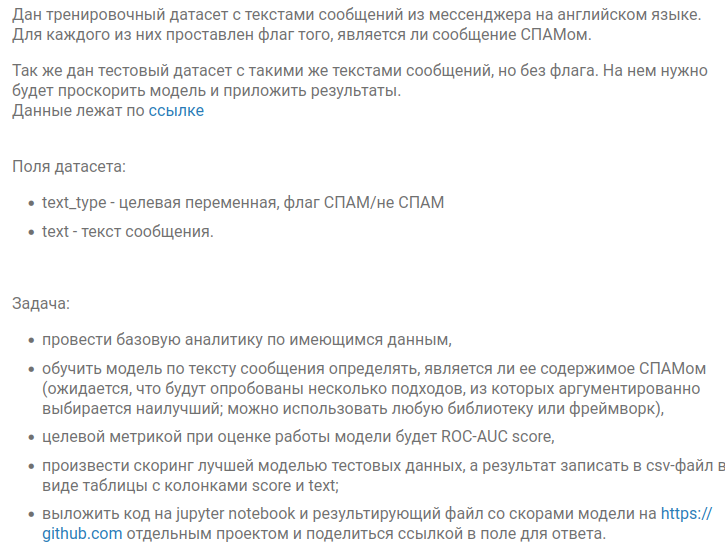

# Imports

In [1]:
!pip install textstat datasets evaluate
!pip install accelerate -U

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 105.1/105.1 kB 3.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 542.0/542.0 kB 13.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 84.1/84.1 kB 12.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.1/2.1 MB 18.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 18.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.1/194.1 kB 23.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
from itertools import groupby
import string
import re

import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk import PorterStemmer
from textstat import flesch_reading_ease

from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC

from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset
import evaluate
from torch.nn import functional as F
import torch


nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
test = pd.read_csv('test_spam.csv')
train = pd.read_csv('train_spam.csv')

# EDA

### –ü—Ä–æ—Å–º–æ—Ç—Ä –∏ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

In [ ]:
train.head()

text_type                                               text
0       ham  make sure alex knows his birthday is over in f...
1       ham  a resume for john lavorato thanks vince i will...
2      spam  plzz visit my website moviesgodml to get all m...
3      spam  urgent your mobile number has been awarded wit...
4       ham  overview of hr associates analyst project per ...

–ü—Ä–æ–ø—É—Å–∫–æ–≤ –Ω–µ—Ç, train –≤ 4 —Ä–∞–∑–∞ –±–æ–ª—å—à–µ test

In [ ]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16278 entries, 0 to 16277
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text_type  16278 non-null  object
 1   text       16278 non-null  object
dtypes: object(2)
memory usage: 254.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4070 entries, 0 to 4069
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4070 non-null   object
dtypes: object(1)
memory usage: 31.9+ KB


(None, None)

–ë—É–¥–µ–º —Å—Ä–∞–≤–Ω–∏–≤–∞—Ç—å –¥–≤–∞ –∫–ª–∞—Å—Å–∞ –º–µ–∂–¥—É —Å–æ–±–æ–π, —á—Ç–æ–±—ã –ø–æ–ø—ã—Ç–∞—Ç—å—Å—è –Ω–∞–π—Ç–∏ –æ—Ç–ª–∏—á–∏—è –≤ –Ω–∏—Ö. –î–∞–Ω–Ω—ã–µ –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ, –ø–æ—Ç–æ–º—É —á—Ç–æ —Å–ø–∞–º–∞ –º–µ–Ω—å—à–µ –ø–æ—á—Ç–∏ –≤ 2.5 —Ä–∞–∑–∞

In [ ]:
spam = train[train['text_type'] == 'spam'].loc[:, 'text']
ham = train[train['text_type'] == 'ham'].loc[:, 'text']

spam.name = 'spam',
ham.name = 'ham'

spam.shape[0], ham.shape[0]

(4809, 11469)

### –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–∏–º–≤–æ–ª–æ–≤ –≤ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–∏

–í–∏–¥–∏–º, —á—Ç–æ spam –∏ ham —Ä–∞—Å—Ö–æ–¥—è—Ç—Å—è –≤ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ —Å–æ–≤—Å–µ–º –∫–æ—Ä–æ—Ç–∫–∏—Ö —Ç–µ–∫—Å—Ç–æ–≤ - –≤ spam —Å–∏–ª—å–Ω–æ –º–µ–Ω—å—à–µ (–ø–æ –æ—Ç–Ω–æ—à–µ–Ω–∏—é –∫ –æ–±—â–µ–º—É –∫–æ–ª–∏—á–µ—Å—Ç–≤—É) —Ç–µ–∫—Å—Ç–æ–≤ –º–µ–Ω—å—à–µ 100 —Å–∏–º–≤–æ–ª–æ–≤

<Axes: >

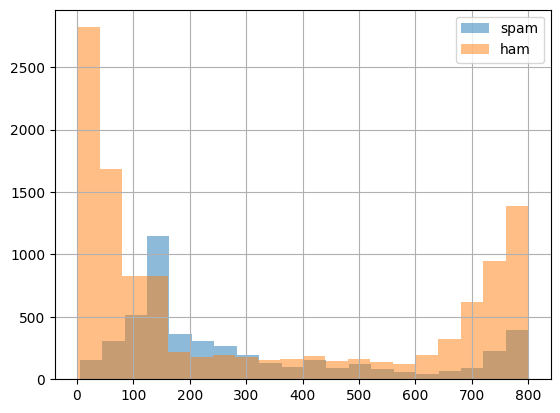

In [ ]:
spam.str.len().hist(bins=20, alpha=0.5, legend=True),
ham.str.len().hist(bins=20, alpha=0.5, legend=True)

### –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –≤ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–∏

–ü–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —Å–ª–æ–≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ—Ö–æ–∂–∏, –Ω–æ —Ç–∞–∫–∞—è –∂–µ –∫–∞—Ä—Ç–∏–Ω–∞ —Å —Å–ª–∏—à–∫–æ–º –∫–æ—Ä–æ—Ç–∫–∏–º–∏ —Ç–µ–∫—Å—Ç–∞–º–∏

<Axes: >

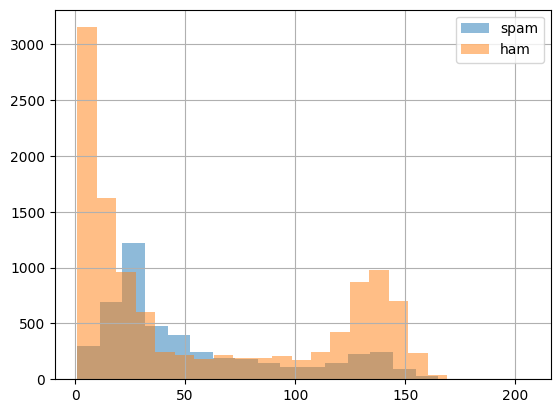

In [ ]:
spam.str.split().map(lambda x: len(x)).hist(bins=20, alpha=0.5, legend=True),
ham.str.split().map(lambda x: len(x)).hist(bins=20, alpha=0.5, legend=True)

### –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–æ–ø-—Å–ª–æ–≤

–ò–Ω—Ç–µ—Ä–µ—Å–Ω–æ, —á—Ç–æ —Å–ª–æ–≤–æ "your" –Ω–µ –≤—Ö–æ–¥–∏—Ç –≤ —Ç–æ–ø-15 –≤ ham - –≤–µ—Ä–æ—è—Ç–Ω–æ, –≤ —Å–ø–∞–º–µ —á–∞—â–µ –æ–±—Ä–∞—â–∞—é—Ç—Å—è –Ω–∞ "—Ç—ã", —á—Ç–æ–±—ã –∑–∞—Ü–µ–ø–∏—Ç—å —á–∏—Ç–∞—Ç–µ–ª—è. –¢–∞–∫–∂–µ, "i" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –≤ —Å–ø–∞–º–µ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Ä–µ–∂–µ - —Å–ø–∞–º —á–∞—Å—Ç–æ –æ–±–µ–∑–ª–∏—á–µ–Ω–Ω—ã–π

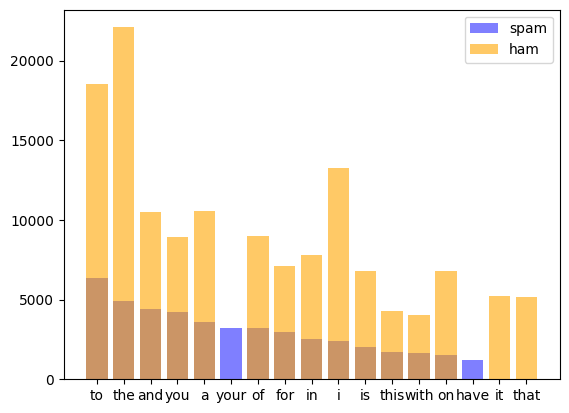

In [ ]:
new_spam = spam.str.split()
new_spam = new_spam.values.tolist()
corpus_spam = [word for i in new_spam for word in i]

new_ham = ham.str.split()
new_ham = new_ham.values.tolist()
corpus_ham = [word for i in new_ham for word in i]

dic = defaultdict(int)
for word in corpus_spam:
    if word in stop:
        dic[word] += 1

top=sorted(dic.items(), key=lambda x:x[1], reverse=True)[:15]
x,y=zip(*top)
plt.bar(x,y, alpha=0.5, color='blue')

dic = defaultdict(int)
for word in corpus_ham:
    if word in stop:
        dic[word] += 1

top=sorted(dic.items(), key=lambda x:x[1], reverse=True)[:15]
x,y=zip(*top)
plt.bar(x,y, alpha=0.6, color='orange')
plt.legend(["spam", "ham"])

### –¢–æ–ø –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö —Å–ª–æ–≤

–ü–æ–¥–æ–∑—Ä–∏—Ç–µ–ª—å–Ω–æ–µ —á–∏—Å–ª–æ 1635465 –ø—Ä–∏–≤–æ–¥–∏—Ç –º–µ–Ω—è –∫ [–∏—Å—Ç–æ—á–Ω–∏–∫—É –¥–∞–Ω–Ω—ã—Ö –Ω–∞ HF](https://huggingface.co/datasets/thehamkercat/telegram-spam-ham). –°—É–¥—è –ø–æ –∫–æ–Ω—Ç–µ–∫—Å—Ç—É, —ç—Ç–∏–º —á–∏—Å–ª–æ–º –∞–Ω–æ–Ω–∏–º–∏–∑–∏—Ä–æ–≤–∞–ª–∏ —á–∏—Å–ª–æ–≤—ã–µ –∏ —Ç–µ–∫—Å—Ç–æ–≤—ã–µ sensitive –¥–∞–Ω–Ω—ã–µ.

–í ham –ø–æ–ø—É–ª—è—Ä–Ω—ã –æ–±—ã—á–Ω—ã–µ —Å–ª–æ–≤–∞ –∏–∑ –¥–µ–ª–æ–≤–æ–π –ø–µ—Ä–µ–ø–∏—Å–∫–∏ –∏ —Å–ª—É–∂–µ–±–Ω—ã–µ —Å–ª–æ–≤–∞ –∏–∑ –µ–º–µ–π–ª–æ–≤. –ú–Ω–µ —Å—Ç–∞–ª–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ, –ø–æ—á–µ–º—É —Ñ–∞–º–∏–ª–∏—è kaminski —Ç–∞–∫ —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è. –ü—Ä–∏—á–∏–Ω–∞ - –¥–∞–Ω–Ω—ã–µ –≤–∑—è—Ç—ã –∏–∑ [Public Domain Enron Email Corpus and Database](http://www.enron-mail.com/), –≤ –∫–æ—Ç–æ—Ä–æ–π vince j kaminski —è–≤–ª—è–ª—Å—è –º–µ–Ω–µ–¥–∂–µ—Ä–æ–º. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –º–Ω–æ–≥–∏–µ —á–∞—Å—Ç—ã–µ —Å–ª–æ–≤–∞ –≤ –¥–∞–Ω–Ω—ã—Ö –æ–±—ä—è—Å–Ω—è—é—Ç—Å—è –æ–¥–Ω–∏–º–∏ –∏ —Ç–µ–º–∏ –∂–µ –∞–¥—Ä–µ—Å–∞—Ç–∞–º–∏ –ø–∏—Å–µ–º –∏ –∫–æ–º–ø–∞–Ω–∏–µ–π Enron, –≥–¥–µ –æ–Ω–∏ —Ä–∞–±–æ—Ç–∞–ª–∏.

<Axes: >

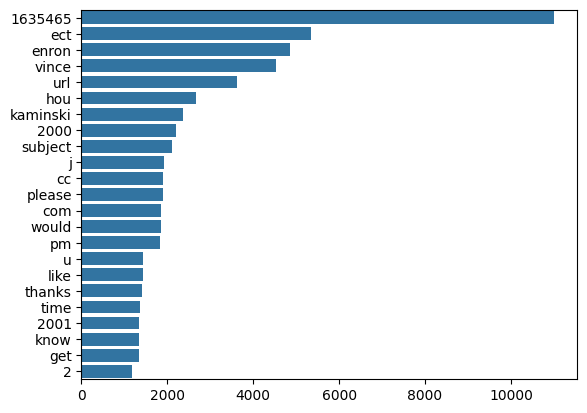

In [ ]:
counter=Counter(corpus_ham)
most=counter.most_common()

x, y= [], []
for word,count in most[:70]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

–í —Å–ø–∞–º–µ –∏–º–µ–Ω –Ω–µ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è. –í –æ—Å–Ω–æ–≤–Ω–æ–º –ø–æ–ø–∞–¥–∞—é—Ç—Å—è —Å–ª–æ–≤–∞, —Å–≤—è–∑–∞–Ω–Ω—ã–µ —Å —Ä–µ–∫–ª–∞–º–æ–π, –ø–æ–±—É–∂–¥–µ–Ω–∏—è–º–∏ –∫ –¥–µ–π—Å—Ç–≤–∏—é –∏ –ø–æ–Ω—è—Ç–∏—è–º–∏, –∞—Å—Å–æ—Ü–∏–∏—Ä—É—é—â–∏–º–∏—Å—è —Å —É—Å–ø–µ—Ö–æ–º (–∫–∞–∫ money, best, business).

<Axes: >

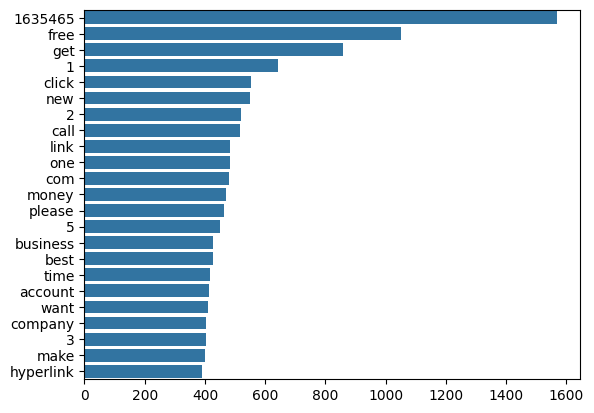

In [ ]:
counter=Counter(corpus_spam)
most=counter.most_common()

x, y= [], []
for word,count in most[:70]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

### –¢–æ–ø –±–∏–≥—Ä–∞–º–º

–í–∏–¥–∏–º, —á—Ç–æ –≤ ham –ø–æ—á—Ç–∏ –Ω–µ—Ç –ø–æ–≤—Ç–æ—Ä—è—é—â–∏—Ö—Å—è –±–∏–≥—Ä–∞–º–º. –ó–∞—Ç–æ –≤ spam –ø–æ–≤—Ç–æ—Ä—è—é—â–∏–µ—Å—è –±–∏–≥—Ä–∞–º–º—ã –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç, –Ω–æ –≤ —Å—Ä–∞–≤–Ω–µ–Ω–∏–∏ —Å –æ–±—ä–µ–º–æ–º –¥–∞—Ç–∞—Å–µ—Ç–∞ —ç—Ç–æ –Ω–∏—á–µ–≥–æ –Ω–µ –¥–∞–µ—Ç.

In [ ]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:15]

get_top_ngram(corpus_ham, 2)

[('81 607', 11),
 ('we re', 3),
 ('byk car', 2),
 ('movie series', 2),
 ('wife gf', 2),
 ('girl guy', 2),
 ('05 52', 1),
 ('hunter gatherers', 1),
 ('song guess', 1),
 ('you re', 1),
 ('jatt baki', 1),
 ('mirror4 mirrortd4bot', 1),
 ('unsuba√¢ way2sms', 1),
 ('wwho why', 1),
 ('why what', 1)]

In [ ]:
get_top_ngram(corpus_spam, 2)

[('movie series', 15),
 ('mobile laptop', 10),
 ('yes noall', 7),
 ('yes noreply', 7),
 ('13k bln', 7),
 ('paisa sms', 6),
 ('you re', 5),
 ('sms day', 5),
 ('rs2 min', 5),
 ('you ve', 5),
 ('15k bln', 5),
 ('100 ùê°ùê®ùêÆùê´', 4),
 ('promo promo', 4),
 ('ùê≤ùê®ùêÆ ùê´ùêû', 3),
 ('days unitech', 3)]

### –ê–Ω–∞–ª–∏–∑ —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ —Ç–µ–∫—Å—Ç–æ–≤

–°—Ä–∞–≤–Ω–∏–≤–∞–µ–º —á–∏—Ç–∞–±–µ–ª—å–Ω–æ—Å—Ç—å —Ç–µ–∫—Å—Ç–æ–≤ –≤ ham –∏ spam. –ù–∏—á–µ–≥–æ –Ω–µ –¥–∞–µ—Ç, –≤—Å–µ –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–µ.

53.55


<Axes: >

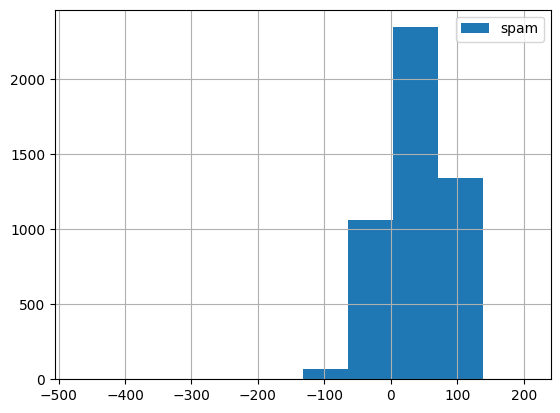

In [ ]:
print(spam.apply(lambda x : flesch_reading_ease(x)).median())
spam.apply(lambda x : flesch_reading_ease(x)).hist(legend=True)

59.64


<Axes: >

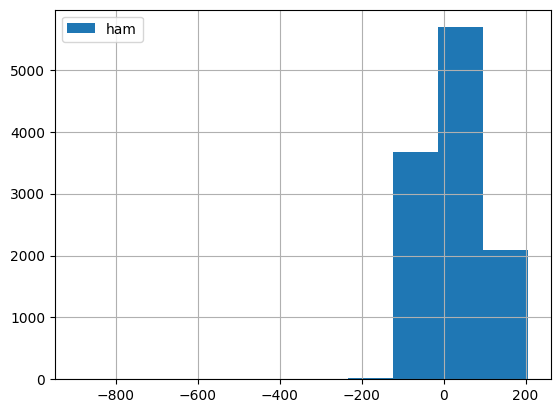

In [ ]:
print(ham.apply(lambda x : flesch_reading_ease(x)).median())
ham.apply(lambda x : flesch_reading_ease(x)).hist(legend=True)

### –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–º–æ–¥–∑–∏ –≤ —Ç–µ–∫—Å—Ç–µ

–ë—ã—Å—Ç—Ä—ã–π –ø—Ä–æ—Å–º–æ—Ç—Ä spam –ø–æ–∫–∞–∑–∞–ª, —á—Ç–æ –≤ —Ç–µ–∫—Å—Ç–∞—Ö –º–Ω–æ–≥–æ —ç–º–æ–¥–∑–∏ (–≤ –æ—Ç–ª–∏—á–∏–µ –æ—Ç ham). –ü—Ä–æ–≤–µ—Ä–∏–º —ç—Ç—É –≥–∏–ø–æ—Ç–µ–∑—É. –í–∏–¥–∏–º, —á—Ç–æ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –≤ spam —Å–∏–ª—å–Ω–æ –±–æ–ª—å—à–µ —ç–º–æ–¥–∑–∏, –Ω–æ –ø—Ä–∏ –±–æ–ª—å—à–æ–º —Ä–∞–∑–º–µ—Ä–µ –¥–∞—Ç–∞—Å–µ—Ç–∞ –∏—Ö –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–µ–≤–µ–ª–∏–∫–æ –∏ –Ω–µ –ø–æ–º–æ–∂–µ—Ç

In [ ]:
spam.apply(lambda s: len(re.findall(r'[\U0001f600-\U0001f650]', s))).value_counts()

(spam,)
0     4616
1       79
2       52
3       16
4       13
5        7
6        7
9        4
10       3
33       3
7        2
8        2
12       2
28       1
20       1
11       1
Name: count, dtype: int64

In [ ]:
ham.apply(lambda s: len(re.findall(r'[\U0001f600-\U0001f650]', s))).value_counts()

ham
0    11439
1       19
2        7
3        2
4        2
Name: count, dtype: int64

### –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–≤—Ç–æ—Ä—è—é—â–∏—Ö—Å—è —Å–∏–º–≤–æ–ª–æ–≤

–¢–∞–∫–∂–µ –∫–∞–∂–µ—Ç—Å—è, —á—Ç–æ –≤ spam —á–∞—Å—Ç–æ –º–Ω–æ–≥–æ –ø–æ–≤—Ç–æ—Ä—è—é—â–∏—Ö—Å—è —Å–∏–º–≤–æ–ª–æ–≤ (–ø–æ–¥—Ä—è–¥) –≤ –æ–¥–Ω–æ–º –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–∏. –ü—Ä–æ–≤–µ—Ä–∏–º. –í spam –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –º–Ω–æ–≥–æ –ø–æ–≤—Ç–æ—Ä—è—é—â–∏—Ö—Å—è —Å–∏–º–≤–æ–ª–æ–≤ –≤ —Ç–µ–∫—Å—Ç–∞—Ö. –°–º–æ—Ç—Ä–∏–º —Ç–æ–ª—å–∫–æ –Ω–∞ –ø–æ–≤—Ç–æ—Ä—ã –±–æ–ª—å—à–µ 2-—Ö –ø–æ–¥—Ä—è–¥ —Å–∏–º–≤–æ–ª–æ–≤ (–∏–Ω–∞—á–µ —ç—Ç–æ –º–æ–≥—É—Ç –±—ã—Ç—å —Å–ª—É—á–∞–π–Ω—ã–µ –ø–æ–≤—Ç–æ—Ä—ã –ø—Ä–æ–±–µ–ª–æ–≤ –∏–ª–∏ —Å–ª–æ–≤–∞ —Å –ø–æ–≤—Ç–æ—Ä—è—é—â–∏–º–∏—Å—è –±—É–∫–≤–∞–º–∏ –≤ —è–∑—ã–∫–µ). –í spam —Ç—Ä–æ–π–Ω–æ–π –∏ –±–æ–ª–µ–µ –ø–æ–≤—Ç–æ—Ä —Å–æ–¥–µ—Ä–∂–∞—Ç –ø–æ—á—Ç–∏ 40% —Ç–µ–∫—Å—Ç–æ–≤, —Ç–æ–≥–¥–∞ –∫–∞–∫ –≤ ham –≤—Å–µ–≥–æ 15%.

In [ ]:
def max_consecutive(s):
  groups = groupby(s)
  result = [sum(1 for _ in group) for label, group in groups]

  return max(result)

In [ ]:
spam.apply(lambda s: max_consecutive(s)).value_counts() / spam.shape[0] * 100

(spam,)
2     59.409441
3     20.128925
4      6.571013
1      2.973591
5      2.973591
6      1.954668
7      1.725931
9      0.873362
8      0.686213
10     0.561447
11     0.457476
12     0.353504
13     0.291121
17     0.270326
16     0.207943
15     0.207943
14     0.166355
18     0.062383
20     0.041589
22     0.041589
21     0.020794
35     0.020794
Name: count, dtype: float64

In [ ]:
ham.apply(lambda s: max_consecutive(s)).value_counts() / ham.shape[0] * 100

ham
2     65.960415
1     18.702590
3     13.994245
4      0.540588
5      0.261575
11     0.156945
10     0.139506
8      0.087192
7      0.061034
6      0.052315
27     0.008719
16     0.008719
21     0.008719
14     0.008719
9      0.008719
Name: count, dtype: float64

# Naive Bayes

–ü–æ–ø—Ä–æ–±—É–µ–º –∫–ª–∞—Å—Å–∏–∫—É

In [5]:
def process(text):
    text = text.lower()
    text = ''.join([t for t in text if t not in string.punctuation])
    text = [t for t in text.split() if t not in stopwords.words('english')]
    st = PorterStemmer()
    text = [st.stem(t) for t in text]
    return text

–ü—Ä–µ–≤—Ä–∞—â–∞–µ–º —Ç–µ–∫—Å—Ç—ã –≤ –≤–µ–∫—Ç–æ—Ä–∞ —á–µ—Ä–µ–∑ TF-IDF, —É–±–∏—Ä–∞—è —Å—Ç–æ–ø-–ø–ª–æ–≤–∞ –∏ –ø—É–Ω–∫—Ç—É–∞—Ü–∏—é –∏ –ø–æ–ª—É—á–∞—è –Ω–∞—á–∞–ª—å–Ω—ã–µ —Ñ–æ—Ä–º—ã –∏–∑ –∫–∞–∂–¥–æ–≥–æ —Å–ª–æ–≤–∞ (stemming)

In [6]:
spam_filter = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer=process)),
    ('classifier', MultinomialNB())
])

–ò—Å–ø–æ–ª—å–∑—É–µ–º –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—é (stratified —Ç.–∫. –∫–ª–∞—Å—Å—ã –Ω–µ —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ) –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏

In [7]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(spam_filter, train['text'], train['text_type'], cv=skf, scoring='roc_auc')

–°—Ä–µ–¥–Ω–µ–µ –ø–æ 5 —Ñ–æ–ª–¥–∞–º - 0.949, —á—Ç–æ –æ—á–µ–Ω—å –¥–∞–∂–µ —Ö–æ—Ä–æ—à–æ –¥–ª—è –ø—Ä–æ—Å—Ç–æ–π –º–æ–¥–µ–ª–∏

In [8]:
print(cv_scores)
print(cv_scores.mean())

[0.94958012 0.94896431 0.94121246 0.94950293 0.95490887]
0.9488337362094622


# LSTM

–ü–æ–ø—Ä–æ–±—É–µ–º LSTM –∫–∞–∫ —Ç–∏–ø–∏—á–Ω—É—é –º–æ–¥–µ–ª—å –¥–ª—è —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π.

In [95]:
train['text_length'] = train['text'].apply(len)
train['label'] = train['text_type'].map({'ham':0, 'spam':1})
train.head()

text_type                                               text  label  \
0       ham  make sure alex knows his birthday is over in f...      0   
1       ham  a resume for john lavorato thanks vince i will...      0   
2      spam  plzz visit my website moviesgodml to get all m...      1   
3      spam  urgent your mobile number has been awarded wit...      1   
4       ham  overview of hr associates analyst project per ...      0   

   text_length  
0           86  
1          520  
2          126  
3          139  
4          733

–ó–∞–¥–∞–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏, –æ–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ–º —Ä–∞–∑–º–µ—Ä —Å–ª–æ–≤–∞—Ä—è –¥–ª—è –∏—Å–∫–ª—é—á–µ–Ω–∏—è —Ä–µ–¥–∫–∏—Ö —Å–ª–æ–≤

In [96]:
max_len = 50
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
vocab_size = 1000
embedding_dim = 16

–°–æ–∑–¥–∞–µ–º –º–æ–¥–µ–ª—å

In [97]:
n_lstm = 128
drop_lstm = 0.2

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(SpatialDropout1D(drop_lstm))
model.add(LSTM(n_lstm, return_sequences=False))
model.add(Dropout(drop_lstm))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            16000     
                                                                 
 spatial_dropout1d (Spatial  (None, 50, 16)            0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 128)               74240     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 90369 (353.00 KB)
Trainable params: 90369 (353.00 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

–ö–æ–º–ø–∏–ª–∏—Ä—É–µ–º –∏ –≤—ã–±–∏—Ä–∞–µ–º –º–µ—Ç—Ä–∏–∫—É ROC AUC

In [98]:
model.compile(loss = 'binary_crossentropy',
               optimizer = Adam(),
               metrics = [AUC()])

–û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å, StratifiedKFold –¥–ª—è —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ —Ä–∞–∑–±–∏–µ–Ω–∏—è, –¥–æ–±–∞–≤–ª—è–µ–º —Ä–∞–Ω–Ω—é—é –æ—Å—Ç–∞–Ω–æ–≤–∫—É –µ—Å–ª–∏ –ª–æ—Å—Å –ø–µ—Ä–µ—Å—Ç–∞–ª —É–º–µ–Ω—å—à–∞—Ç—å—Å—è

In [99]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

num_epochs = 10
histories = []

X, y = train['text'], train['label']
for train_index, test_index in skf.split(X, y):
    print("-----------------------------")
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]

    tokenizer = Tokenizer(num_words = vocab_size,
                          char_level = False,
                          oov_token = oov_tok)
    tokenizer.fit_on_texts(X_train)

    training_sequences = tokenizer.texts_to_sequences(X_train)
    training_padded = pad_sequences(training_sequences,
                                    maxlen = max_len,
                                    padding = padding_type,
                                    truncating = trunc_type)

    testing_sequences = tokenizer.texts_to_sequences(X_val)
    testing_padded = pad_sequences(testing_sequences,
                                  maxlen = max_len,
                                  padding = padding_type,
                                  truncating = trunc_type)

    early_stop = EarlyStopping(monitor='val_loss', patience=2)
    history = model.fit(training_padded,
                        y_train,
                        epochs=num_epochs,
                        validation_data=(testing_padded, y_val),
                        callbacks =[early_stop],
                        verbose=2)
    histories.append(history)

-----------------------------
Epoch 1/10
407/407 - 27s - loss: 0.2967 - auc_2: 0.9312 - val_loss: 0.1857 - val_auc_2: 0.9763 - 27s/epoch - 67ms/step
Epoch 2/10
407/407 - 5s - loss: 0.1852 - auc_2: 0.9703 - val_loss: 0.1930 - val_auc_2: 0.9753 - 5s/epoch - 13ms/step
Epoch 3/10
407/407 - 4s - loss: 0.1664 - auc_2: 0.9747 - val_loss: 0.1791 - val_auc_2: 0.9769 - 4s/epoch - 11ms/step
Epoch 4/10
407/407 - 3s - loss: 0.1632 - auc_2: 0.9767 - val_loss: 0.2138 - val_auc_2: 0.9710 - 3s/epoch - 9ms/step
Epoch 5/10
407/407 - 3s - loss: 0.1483 - auc_2: 0.9791 - val_loss: 0.1813 - val_auc_2: 0.9777 - 3s/epoch - 7ms/step
-----------------------------
Epoch 1/10
407/407 - 3s - loss: 0.3211 - auc_2: 0.9193 - val_loss: 0.1969 - val_auc_2: 0.9738 - 3s/epoch - 7ms/step
Epoch 2/10
407/407 - 4s - loss: 0.1880 - auc_2: 0.9712 - val_loss: 0.1810 - val_auc_2: 0.9760 - 4s/epoch - 9ms/step
Epoch 3/10
407/407 - 3s - loss: 0.1619 - auc_2: 0.9776 - val_loss: 0.1803 - val_auc_2: 0.9772 - 3s/epoch - 7ms/step
Epoch 4

–í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º ROC AUC –ø–æ —Ñ–æ–ª–¥—É —Å —Å–∞–º—ã–º –±–æ–ª—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —ç–ø–æ—Ö. –ì—Ä–∞—Ñ–∏–∫–∏ –≤—ã–≥–ª—è–¥—è—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ, –±–µ–∑ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è. –ù–∞ –ø–µ—Ä–≤—ã—Ö —ç–ø–æ—Ö–∞—Ö val –≤—ã—à–µ train –∏–∑-–∑–∞ –¥—Ä–æ–ø–∞—É—Ç–∞.

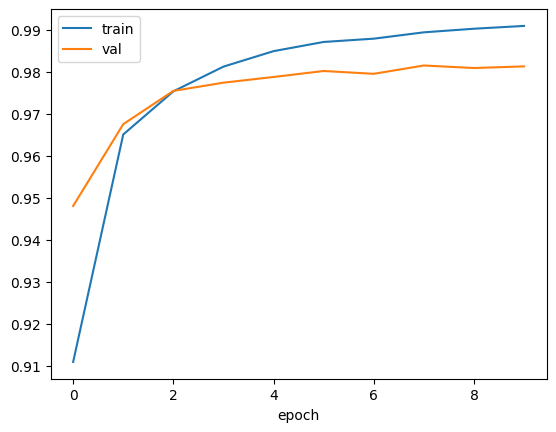

In [102]:
plt.plot(histories[4].history['auc_2'])
plt.plot(histories[4].history['val_auc_2'])
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

–°—Ä–µ–¥–Ω–µ–µ –∫–∞—á–µ—Å—Ç–≤–æ (–∏–º–µ—é –≤ –≤–∏–¥—É ROC AUC) –≤—ã—à–µ, —á–µ–º —É Naive Bayes, –∑–Ω–∞—á–∏—Ç LSTM –ø—Ä–µ–¥–ø–æ—á—Ç–∏—Ç–µ–ª—å–Ω–µ–µ. –ï—â–µ –∏ —Ä–∞–±–æ—Ç–∞–µ—Ç —á—É—Ç—å –±—ã—Å—Ç—Ä–µ–µ —á–µ–º Naive Bayes –≤ —Ç–µ—Ö –∂–µ —É—Å–ª–æ–≤–∏—è—Ö (—Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ —Ä–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞ –≤ —ç—Ç–æ–º –ø–æ–º–æ–≥–∞–µ—Ç)

In [104]:
[x.history['val_auc_2'][-1] for x in histories]

[0.9776872992515564,
 0.9778369665145874,
 0.9762862920761108,
 0.9700455069541931,
 0.9812210202217102]

# BERT

–ò—Å–ø–æ–ª—å–∑—É–µ–º –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å BERT –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π. –î–∞–Ω–Ω—ã–π –±–ª–æ–∫ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –∑–∞–ø—É—Å–∫–∞—Ç—å –Ω–∞ GPU.

In [4]:
train['label'] = train['text_type'].map({'ham':0, 'spam':1})
train.head()

text_type                                               text  label
0       ham  make sure alex knows his birthday is over in f...      0
1       ham  a resume for john lavorato thanks vince i will...      0
2      spam  plzz visit my website moviesgodml to get all m...      1
3      spam  urgent your mobile number has been awarded wit...      1
4       ham  overview of hr associates analyst project per ...      0

–¢–æ–∫–µ–Ω–∞–π–∑–µ—Ä —Ç–æ–∂–µ –≥–æ—Ç–æ–≤—ã–π

In [5]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [6]:
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


–ù–∞ KFold –±—É–¥–µ—Ç —Å–ª–∏—à–∫–æ–º –¥–æ–ª–≥–æ —Ä–∞–±–æ—Ç–∞—Ç—å, –ø–æ—ç—Ç–æ–º—É –∏—Å–ø–æ–ª—å–∑—É–µ–º –æ–±—ã—á–Ω–æ–µ —Ä–∞–∑–±–∏–µ–Ω–∏–µ –Ω–∞ train test

In [61]:
X, y = train['text'], train['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

train_data = pd.concat([X_train, y_train], axis=1)
eval_data = pd.concat([X_test, y_test], axis=1)
train_dataset = Dataset.from_pandas(train_data)
eval_dataset = Dataset.from_pandas(eval_data)

In [62]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets_train = train_dataset.map(tokenize_function, batched=True)
tokenized_datasets_eval = eval_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/10906 [00:00<?, ? examples/s]

Map:   0%|          | 0/5372 [00:00<?, ? examples/s]

–ú–µ—Ç—Ä–∏–∫–∞ ROC AUC

In [9]:
training_args = TrainingArguments(output_dir="test_trainer")

metric = evaluate.load("roc_auc")

In [10]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [11]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets_train,
    eval_dataset=tokenized_datasets_eval,
    compute_metrics=compute_metrics,
)

–û–±—É—á–µ–Ω–∏–µ –Ω–∞ GPU (T4 –≤ Google Colab) –∑–∞–Ω–∏–º–∞–µ—Ç , –ø–æ—ç—Ç–æ–º—É –µ—Å–ª–∏ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è –∫—Ä–∏—Ç–∏—á–Ω–æ - –ª—É—á—à–µ –≤—ã–±–∏—Ä–∞—Ç—å LSTM

In [12]:
trainer.train()

TrainOutput(global_step=4092, training_loss=0.08991964480394492, metrics={'train_runtime': 3249.5325, 'train_samples_per_second': 10.069, 'train_steps_per_second': 1.259, 'total_flos': 8608467509268480.0, 'train_loss': 0.08991964480394492, 'epoch': 3.0})

In [79]:
eval_dataset = Dataset.from_pandas(eval_data[['text']])
tokenized_datasets_eval= eval_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/5372 [00:00<?, ? examples/s]

In [80]:
eval_output = trainer.predict(tokenized_datasets_eval)

In [81]:
eval_logits = torch.from_numpy(eval_output.predictions)

eval_scores = F.softmax(eval_logits, dim = -1).numpy()

In [85]:
labels = torch.argmax(torch.from_numpy(eval_scores), 1)

–ü–æ–ª—É—á–∞–µ–º —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏ —á—É—Ç—å –ø–æ–º–µ–Ω—å—à–µ, —á–µ–º —É LSTM. –í–æ–∑–º–æ–∂–Ω–æ —ç—Ç–æ –∏–∑-–∑–∞ –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤, –ª–∏–±–æ –ø—Ä–∏ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ –º–æ–≥ –ø–æ–ª—É—á–∏—Ç—å—Å—è –≤ —Å—Ä–µ–¥–Ω–µ–º —Ç–∞–∫–æ–π –∂–µ —Å–∫–æ—Ä

In [94]:
m = AUC()
m.update_state(eval_data['label'].tolist(), labels.tolist())
print(m.result())

tf.Tensor(0.96683884, shape=(), dtype=float32)


# Scoring

–¢–∞–∫ –∫–∞–∫ –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã—à–µ –≤—Å–µ–≥–æ —É LSTM - —Å–∫–æ—Ä–∏–Ω–≥ –Ω–∞ –Ω–µ–π

In [106]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            16000     
                                                                 
 spatial_dropout1d (Spatial  (None, 50, 16)            0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 128)               74240     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 90369 (353.00 KB)
Trainable params: 90369 (353.00 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [109]:
test_sequences = tokenizer.texts_to_sequences(test['text'])
test_padded = pad_sequences(test_sequences,
                            maxlen = max_len,
                            padding = padding_type,
                            truncating = trunc_type)

In [110]:
prediction = model.predict(test_padded)

128/128 [==============================] - 1s 5ms/step


In [115]:
prediction[:10]

array([[3.0009414e-03],
       [2.6030613e-02],
       [7.2850868e-05],
       [5.8666426e-03],
       [9.5283902e-01],
       [1.4091039e-02],
       [9.4752796e-03],
       [1.3163906e-04],
       [1.6297431e-04],
       [5.7496983e-03]], dtype=float32)

In [117]:
test['score'] = prediction
test.head(7)

text     score
0  j jim whitehead ejw cse ucsc edu writes j you ...  0.003001
1  original message from bitbitch magnesium net p...  0.026031
2  java for managers vince durasoft who just taug...  0.000073
3               there is a youtuber name saiman says  0.005867
4  underpriced issue with high return on equity t...  0.952839
5                          aight lemme know whats up  0.014091
6  hey girl how r u hope u r well me an del r bak...  0.009475

In [118]:
test.to_csv('predictions.csv', index=False, columns=['score', 'text'])